<a href="https://colab.research.google.com/github/saswata121924/Programming_languages_trend_over_time/blob/main/Programming_languages_trend_over_time.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
df = pd.read_csv("QueryResults.csv", names=['DATE', 'TAG', 'POSTS'], header=0)
df.head()

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,javascript,162
3,2008-08-01 00:00:00,c,85
4,2008-08-01 00:00:00,python,124


In [5]:
df.isna()

,DATE,TAG,POSTS
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
1986,False,False,False
1987,False,False,False
1988,False,False,False
1989,False,False,False


In [6]:
clean_df = df.dropna()

In [7]:
clean_df.shape

(1991, 3)

In [8]:
for column in clean_df:
  f"{column}  {clean_df[column].count()}"

In [11]:
clean_df.groupby('TAG').sum()

<ipython-input-11-c09067d50826>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  clean_df.groupby('TAG').sum()


,POSTS
TAG,
assembly,34852
c,336042
c#,1423530
c++,684210
delphi,46212
go,47499
java,1696403
javascript,2056510
perl,65286


In [12]:
clean_df['DATE'] = pd.to_datetime(clean_df['DATE'])
clean_df.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,javascript,162
3,2008-08-01,c,85
4,2008-08-01,python,124


In [13]:
df.count()

DATE     1991
TAG      1991
POSTS    1991
dtype: int64

In [17]:
reshaped_df = clean_df.pivot(index='DATE', columns='TAG', values='POSTS')
reshaped_df = reshaped_df.fillna(0)
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,85.0,511.0,164.0,14.0,0.0,222.0,162.0,28.0,161.0,124.0,0.0,73.0,0.0
2008-09-01,28.0,321.0,1649.0,755.0,105.0,0.0,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,0.0
2008-10-01,15.0,303.0,1989.0,811.0,112.0,0.0,1153.0,725.0,127.0,617.0,510.0,0.0,249.0,0.0
2008-11-01,17.0,259.0,1730.0,735.0,141.0,0.0,958.0,579.0,97.0,504.0,452.0,1.0,160.0,0.0


In [19]:
reshaped_df.shape

(145, 14)

In [21]:
reshaped_df.count()

TAG
assembly      145
c             145
c#            145
c++           145
delphi        145
go            145
java          145
javascript    145
perl          145
php           145
python        145
r             145
ruby          145
swift         145
dtype: int64

In [22]:
reshaped_df.isna().values.any()

False

In [23]:
import matplotlib.pyplot as plt

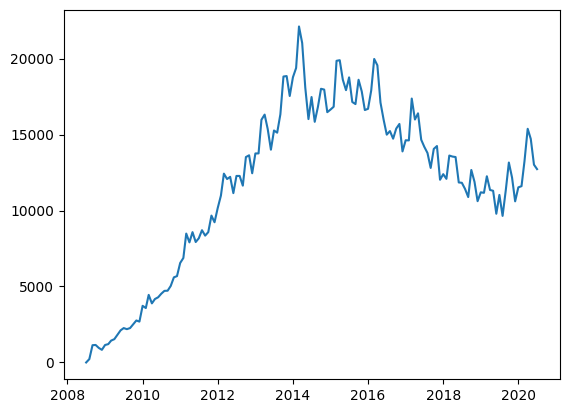

In [25]:
plt.plot(reshaped_df.index, reshaped_df['java'])

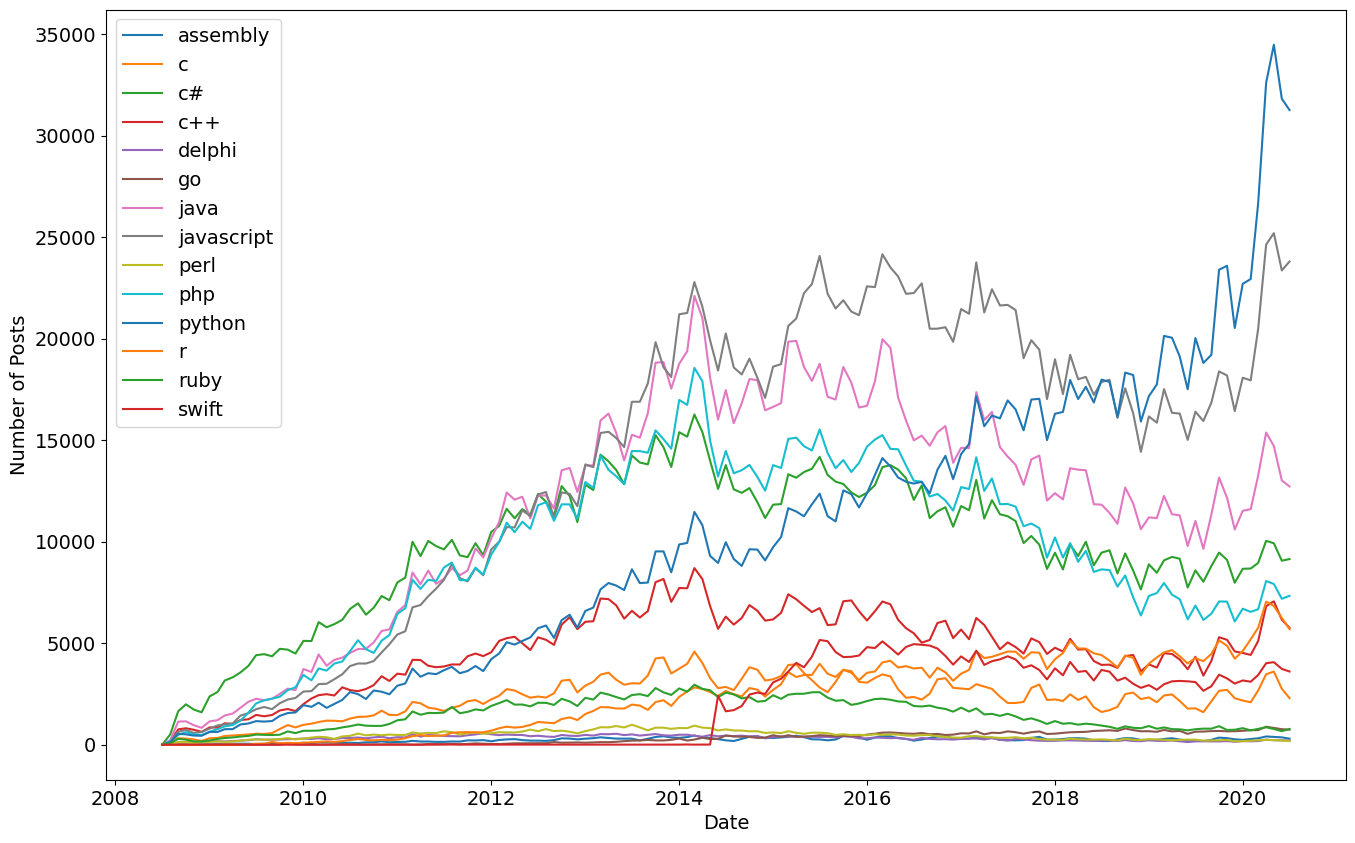

In [30]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
for column in reshaped_df.columns:
  plt.plot(reshaped_df.index, reshaped_df[column], label=reshaped_df[column].name)
plt.legend(fontsize=14)

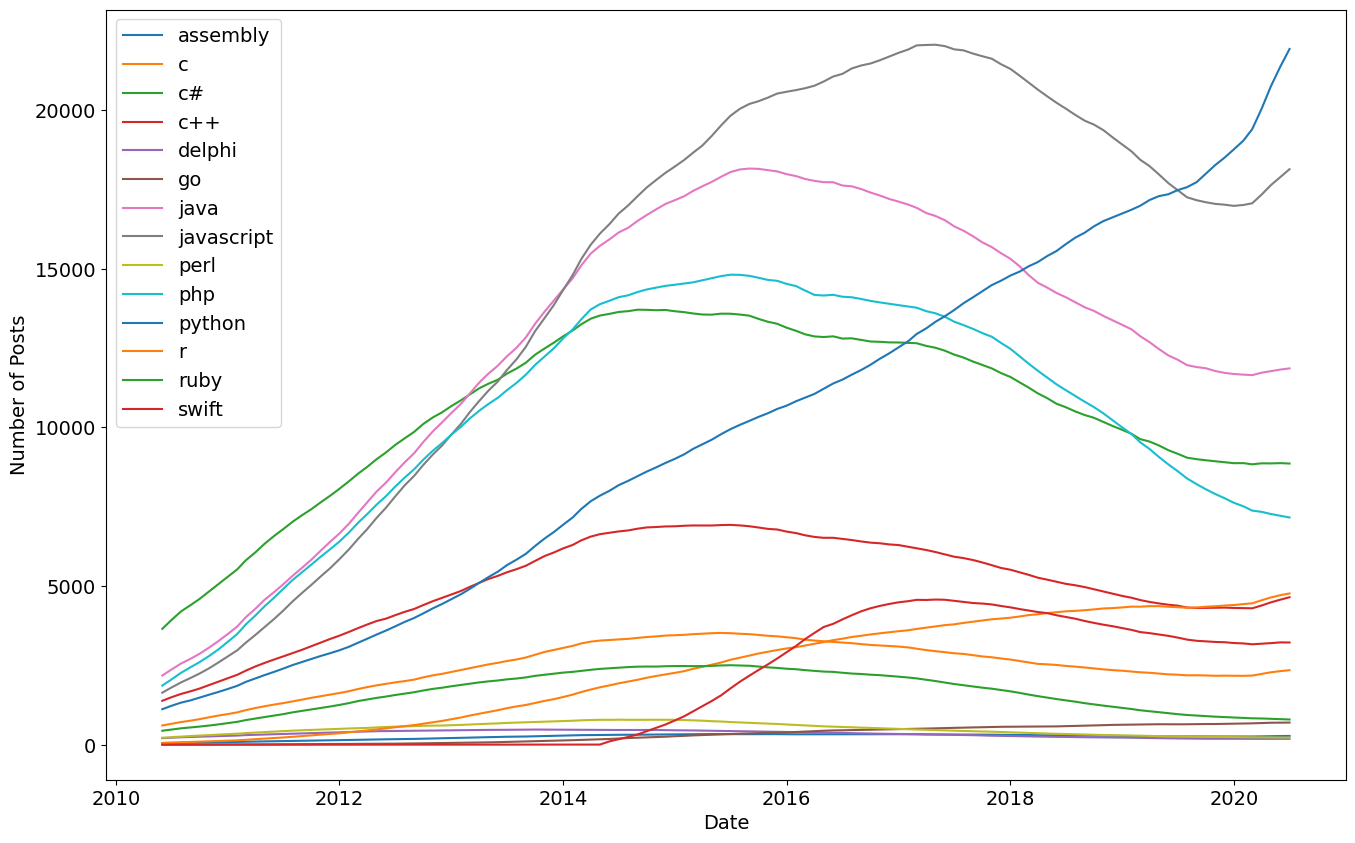

In [35]:
roll_df = reshaped_df.rolling(window=24).mean()
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
for column in reshaped_df.columns:
  plt.plot(reshaped_df.index, roll_df[column], label=roll_df[column].name)
plt.legend(fontsize=14)